In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path

def plot(df, pivot, xlabel, ylabel, ltitle, title, folder):
    plt = None
    if pivot is None:
        plt = df.plot(kind='bar', title=title,
                      x=df.columns[0], y=df.columns[1], xlabel=xlabel, ylabel=ylabel, legend=False)
    else:
        plt = df.pivot(*pivot).plot(kind='bar', title=title,
                                    xlabel=xlabel, ylabel=ylabel)
        plt.legend(loc='upper left', ncol=5, prop={'size': 8}, title=ltitle)
    plt.figure.savefig(f'{folder}/{title}.png', bbox_inches="tight", dpi=300)
    
def extract(files, cols):
    dfs = []
    df_cols = []
    for f in files:
        _df = pd.read_csv(f, usecols=cols)
        dfs.append(_df)
        df_cols.append(_df[cols[-1]])
    df = dfs[0][cols[:-1]]
    df_col = pd.concat(df_cols).groupby(level=0).mean()
    df = pd.concat([df,df_col], axis=1)    
    return df

def extract_mean(benchmarks, results_folder, policy):
    for b in benchmarks:
        df = None
        cols = None
        pivot = None
        if 'sw4' in b or 'NPB' in b:
            cols = ['omp_threads', 'solve_time(seconds)']
        elif 'STREAM' in b:
            cols = ['omp_threads', 'function', 'bandwidth']
            pivot = ['function', 'omp_threads', 'bandwidth']
        else:
            cols = ['omp_threads', 'size', 'solve_time(seconds)']
            pivot = ['size', 'omp_threads', 'solve_time(seconds)']
        df = extract(Path(f'{results_folder}/{policy}').glob(f'{b}*.csv'), cols)
        df.to_csv(f'{results_folder}/{b}_{policy}.csv')


In [ ]:
benchmarks = ['amg', 'gapbs_cc', 'gapbs_pr', 'minivite_x', 'NPB_bt', 'NPB_ft', 'NPB_lu', 'NPB_sp', 'STREAM', 'sw4lite']
policies = ['spread', 'close', 'P-spread', 'E-spread']
results_folder = 'results_07_29_2022-17_15_51'
for policy in policies:
    extract_mean(benchmarks, results_folder, policy)

In [ ]:
import ipywidgets as widgets

benchmarks = ['amg', 'gapbs_cc', 'gapbs_pr', 'minivite_x', 'NPB_bt', 'NPB_ft', 'NPB_lu', 'NPB_sp', 'STREAM', 'sw4lite']
policies = ['spread', 'close', 'P-spread', 'E-spread']

def plot_diff(b):
    cols = None
    pivot = None
    colwrap = 0
    b = w_benchmark.value
    if 'sw4' in b or 'NPB' in b:
        cols = ['omp_threads', 'solve_time(seconds)']
        pivot = cols
    elif 'STREAM' in b:
        cols = ['omp_threads', 'function', 'bandwidth']
        pivot = ['omp_threads', 'bandwidth', 'function']
        colwrap = 2
    else:
        cols = ['omp_threads', 'size', 'solve_time(seconds)']
        pivot = ['omp_threads', 'solve_time(seconds)', 'size']
        colwrap = 3
    # if w_pivotx.value == w_pivotz.value:
    #     print("Error: Pivot X and Pivot Z can't be same")
    # else:
    sns_plot_cat(
        b,
        w_baseline.value,
        'results_07_29_2022-17_15_51',
        cols,
        colwrap,
        *pivot
    )

w_benchmark = widgets.Dropdown(
    options=benchmarks,
    description='Benchmark:',
    disabled=False,
)
w_baseline = widgets.Dropdown(
    options=policies,
    description='Baseline:',
    disabled=False,
)
w_pivotx = widgets.Dropdown(
    options=['size', 'omp_threads'],
    description='Pivot X:',
    disabled=False,
)
w_pivotz = widgets.Dropdown(
    options=['size', 'omp_threads'],
    description='Pivot Z:',
    disabled=False,
)
w_plot = widgets.Button(
    description='Plot',
    disabled=False,
    button_style='success',
    tooltip='Plot Results',
    icon='check'
)
w_plot.on_click(plot_diff)

widgets.HBox ([ w_benchmark, w_baseline, w_plot ]) #w_pivotx, w_pivotz



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

all_policies = ['close', 'spread', 'P-spread', 'E-spread']

def sns_plot_cat(benchmark, baseline, results_folder, cols, colwrap, xvar, yvar, zvar=None):
    policies = [x for x in all_policies if x != baseline]
    dfs = []
    baseline_data = pd.read_csv(f'{results_folder}/{benchmark}_{baseline}.csv', usecols=cols)
    for policy in policies:
        _df = pd.read_csv(f'{results_folder}/{benchmark}_{policy}.csv', usecols=cols)
        _df[yvar] = baseline_data[yvar] - _df[yvar]
        dfs.append(_df)
    df = pd.concat(dfs)
    df['policy'] = np.repeat(policies, [len(x) for x in dfs])
    if zvar == None:
        sns.catplot(data=df, x=xvar, y=yvar, hue='policy', kind='swarm', height=3)
    else:
        sns.catplot(data=df, x=xvar, y=yvar, hue='policy', col=zvar, col_wrap=colwrap, kind='swarm', height=3)
    plt.savefig(f'{results_folder}/{benchmark}.png', bbox_inches="tight", dpi=300, facecolor='w')


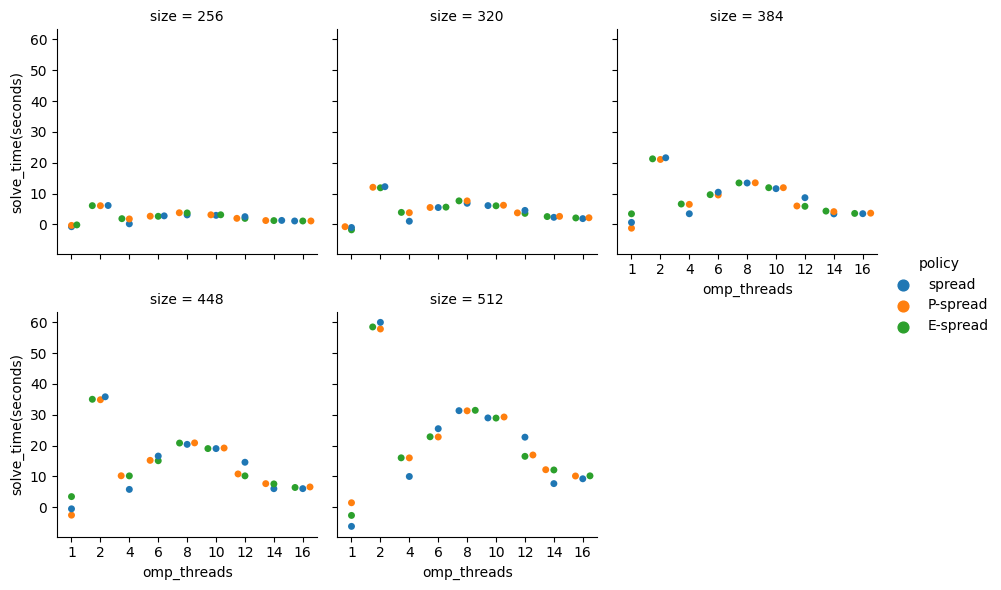

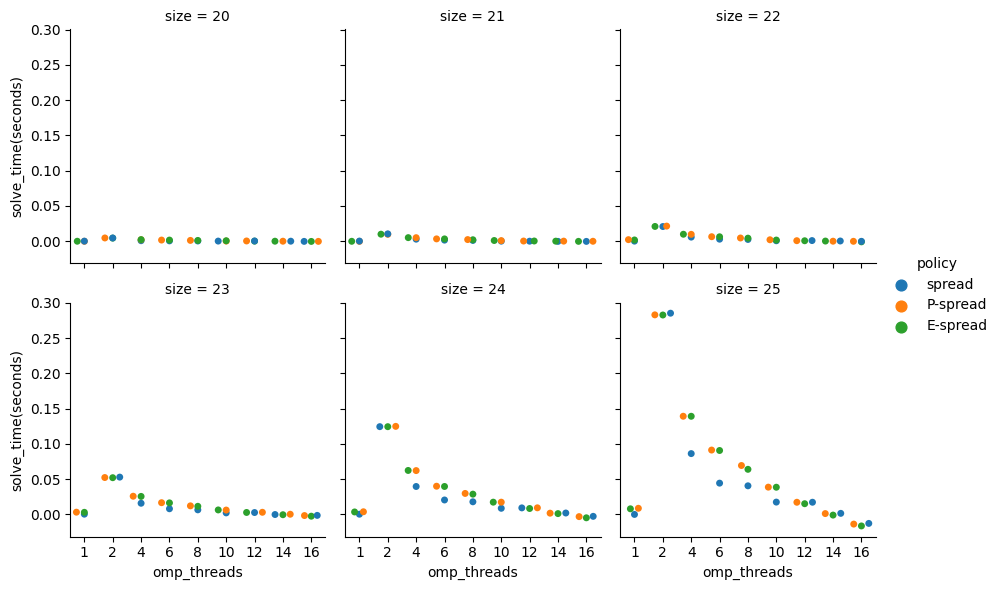

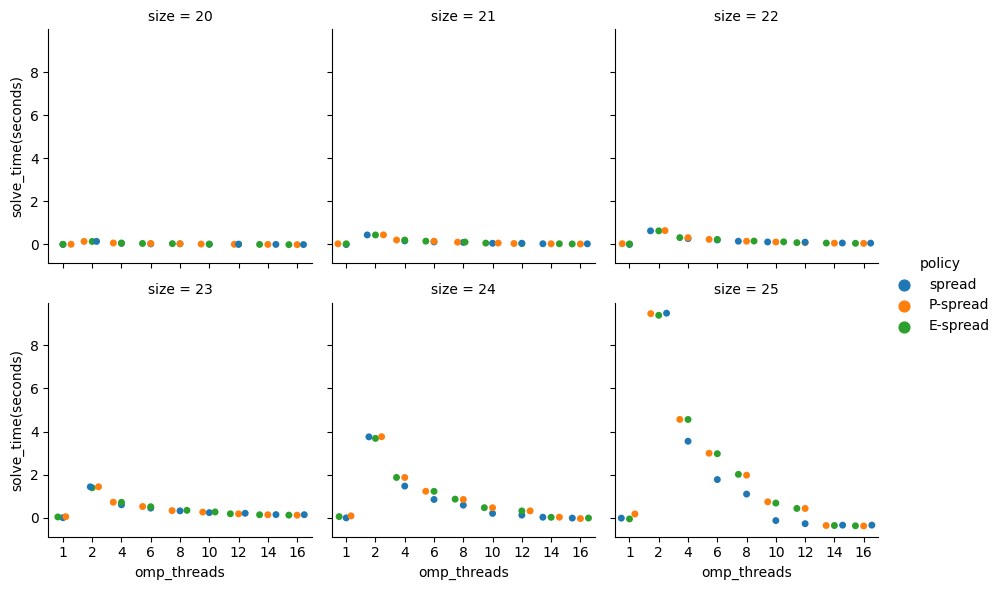

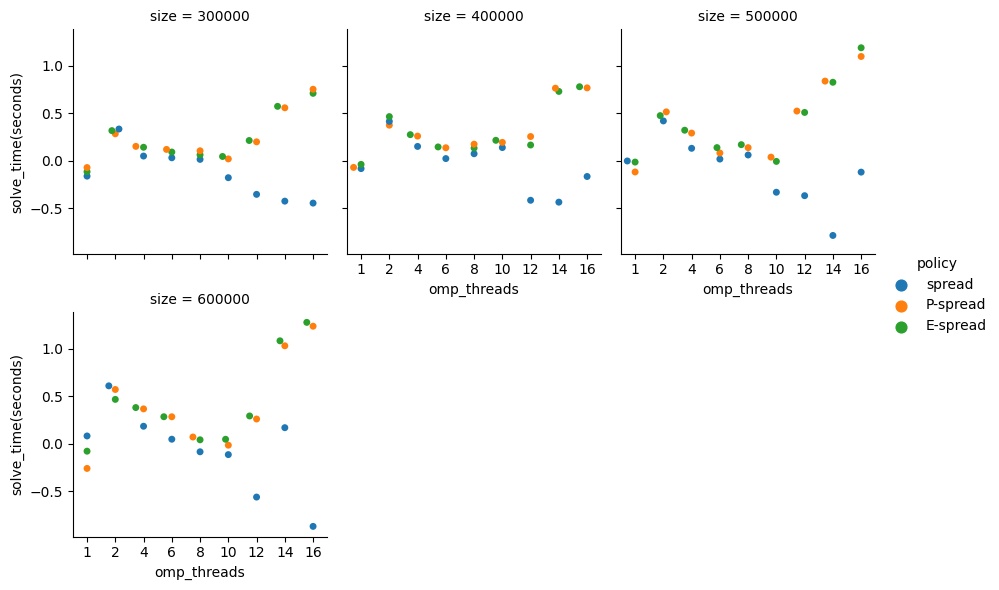

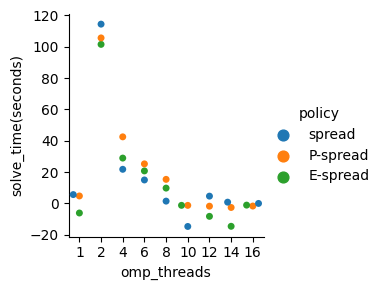

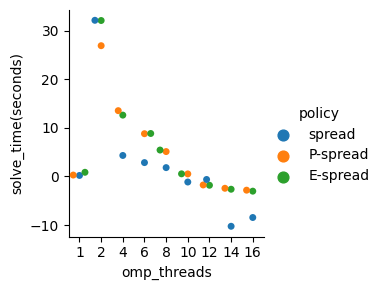

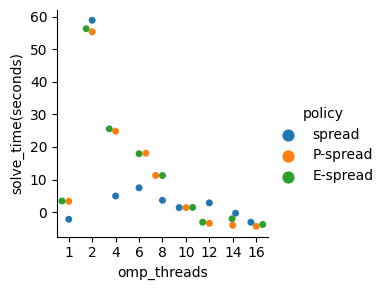

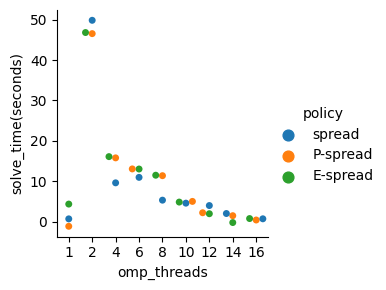

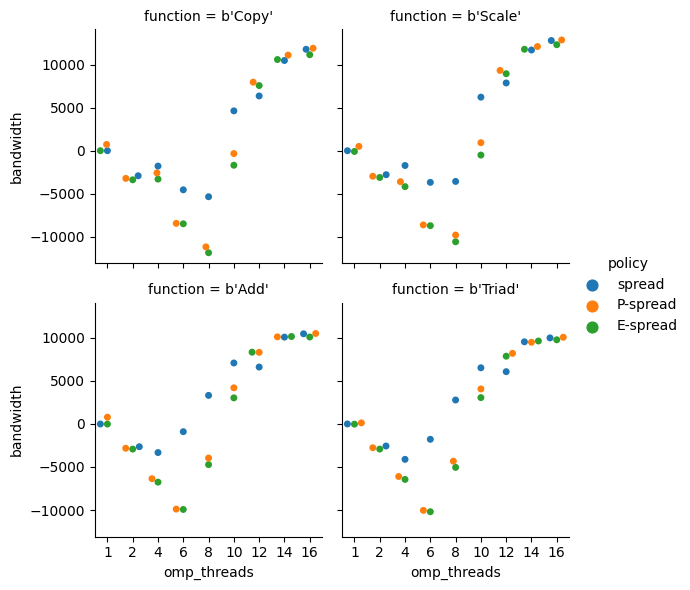

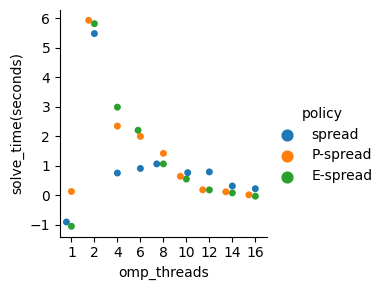

In [7]:
benchmarks = ['amg', 'gapbs_cc', 'gapbs_pr', 'minivite_x', 'NPB_bt', 'NPB_ft', 'NPB_lu', 'NPB_sp', 'STREAM', 'sw4lite']
policies = ['spread', 'close', 'P-spread', 'E-spread']

for b in benchmarks:
    cols = None
    pivot = None
    colwrap = 0
    if 'sw4' in b or 'NPB' in b:
        cols = ['omp_threads', 'solve_time(seconds)']
        pivot = cols
    elif 'STREAM' in b:
        cols = ['omp_threads', 'function', 'bandwidth']
        pivot = ['omp_threads', 'bandwidth', 'function']
        colwrap = 2
    else:
        cols = ['omp_threads', 'size', 'solve_time(seconds)']
        pivot = ['omp_threads', 'solve_time(seconds)', 'size']
        colwrap = 3
    
    sns_plot_cat(
        b,
        'close',
        'results_07_29_2022-17_15_51',
        cols,
        colwrap,
        *pivot
    )